In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def f(x):
    return 3*x**2 - 4*x + 5

In [8]:
f(3.0)

20.0

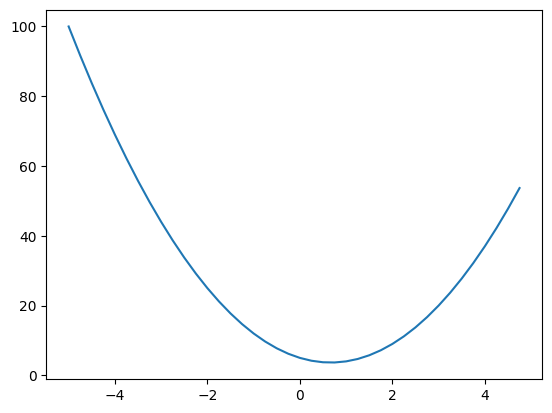

In [9]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs,ys)

In [10]:
# derivative of this function at any single point - x , whats it gonna be?
## sensitivity of a function's output to its input
# f'(x) = lim h->0 [f(x+h) - f(x)] / h

h = 0.00000000001
x = 2/3
(f(x + h) - f(x))/h

0.0

In [11]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0 
d = a*b + c
print(d)

4.0


In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self, other), '+', label= f"{self.label} + {other.label}")
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, ( self, other), '*', label = f"{self.label} * {other.label}")
        return out 
    
    
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b ; e.label = 'e'
d = e + c ; d.label = 'd'
f = Value(-2, label='f')
L = d * f; L.label = 'L'
L



Value(data=-8.0)

In [85]:

# a + b => python will internally call a.__add__(b) => return Value(self.data + other.data) => 10.0 + (-3.0) => Value(7.0)




for x in d._prev:
    print(x, "=> ", x._prev)


# we need to have pointers - to know which value leads to which 
#  c = a * b => telling c abt a&b deetails
print( d._prev )
print( d._op)


Value(data=-6.0) =>  {Value(data=2.0), Value(data=-3.0)}
Value(data=10.0) =>  set()
{Value(data=-6.0), Value(data=10.0)}
+


In [100]:
from graphviz import Digraph

def trace(root):
    # builds a set of nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges 


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir':'LR'}) # LR - left tp roght
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph create a rectangular record node
        dot.node(name= uid, label = f"{{{n.label} | data {n.data} | grad {n.grad}}} ", shape='record')
        
        if n._op:
            # if 'n' value is the result of an operation, create a node for the op
            dot.node( name = uid + n._op, label = n._op)
            # connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1,n2 in edges:
        # connect node n1 to n2
        dot.edge(str(id(n1)), str(id(n2))+ n2._op)
        
    return dot

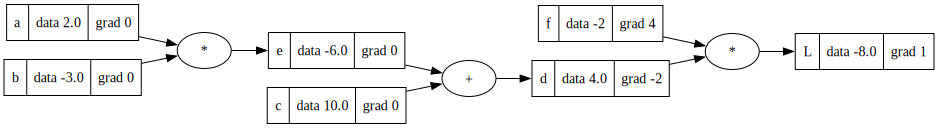

In [124]:
draw_dot(L) 

In [ ]:
L = d * f = (e+c) * f = ( (a*b) + c ) * f 
L = abf  + cf 
dL / dc = 0 + f  = -2 

In [140]:
def lol():
    
    h = 0.0001 * 20
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b ; e.label = 'e'
    d = e + c ; d.label = 'd'
    f = Value(-2, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0  , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0 + h, label='c')
    e = a * b ; e.label = 'e'
    d = e + c ; d.label = 'd'
    f = Value(-2  , label='f')
    L = d * f; L.label = 'L'
    L2 = L.data 
    
    print((L2 - L1) / h )
    print(L)
    
lol()
    

-2.000000000000668
Value(data=-8.004000000000001)


In [ ]:
L = d * f 
dL/dd = ? f 
dL/df = ? d 

f(x+h)-f(x)/ h 

((d+h)*f - d* f ) / h
(df + hf - df) / h

hf / h

f 

L = d * f  
L = (e+c) * f  = ef + cf 
dL/de = f 


This is the forward pass, the forward propagation \
All values when fed into this mathematical expression, produce a final value => L 

Now lets do back ward pass, the backward propagation \
Lets check whats the derivative of each value with respect to L \
Or how much effect each variable has, on our final variable, L 

Loss of a neural net - how it changes with each weight modification?? \
More like - How the weights are impacting the loss function? \
e dodnot wanna use the derivative of loss function with data - as data is fixed and only weights are open to change \

Lets have a variable in the value class that tracks the efefct it has on loss function  - called grad 

In [ ]:
e.grad = -2 ?

Can "e" change? coz u shud not manipultae "e" as it changes only when either a or b changes \
So then, how do u compute its gradient, without changing it? Yes, u edit and gauge the effect, no issue 